In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 30)
plt.style.use('ggplot')

In [31]:
df = pd.read_csv("Cleaned Dataset.csv", parse_dates=['Created_Date'])
df.head()

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude,Created_Date
0,1.0,T-Series,245000000,228000000000,Music,T-Series,20082,India,IN,Music,1.0,1,1,2.258000e+09,564600,9000000,6800000,108400000,2000000.0,28.1,1366417754,5.36,471031528,20.593684,78.962880,2006-03-13
1,2.0,MrBeast,166000000,28368841870,Entertainment,MrBeast,741,United States,US,Entertainment,50.0,1,1,1.348000e+09,337000,5400000,4000000,64700000,8000000.0,88.2,328239523,14.70,270663028,37.090240,-95.712891,2012-02-20
2,3.0,Cocomelon - Nursery Rhymes,162000000,164000000000,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,2.0,2,1,1.975000e+09,493800,7900000,5900000,94800000,1000000.0,88.2,328239523,14.70,270663028,37.090240,-95.712891,2006-09-01
3,4.0,SET India,159000000,148000000000,Shows,SET India,116536,India,IN,Entertainment,3.0,2,2,1.824000e+09,455900,7300000,5500000,87500000,1000000.0,28.1,1366417754,5.36,471031528,20.593684,78.962880,2006-09-20
4,5.0,Kids Diana Show,112000000,93247040539,People & Blogs,Kids Diana Show,1111,United States,US,Entertainment,5.0,3,3,7.316740e+08,182900,2900000,2200000,35100000,NaN,88.2,328239523,14.70,270663028,37.090240,-95.712891,2015-05-12


In [32]:
# Filling 1 missing value in 'Youtuber' and 'Title' upon Internet research
df['Youtuber'].fillna('Cognizer', inplace=True)
df['Title'].fillna('Cognizer', inplace=True)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 26 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   rank                                     973 non-null    float64       
 1   Youtuber                                 973 non-null    object        
 2   subscribers                              973 non-null    int64         
 3   video views                              973 non-null    int64         
 4   category                                 973 non-null    object        
 5   Title                                    973 non-null    object        
 6   uploads                                  973 non-null    int64         
 7   Country                                  973 non-null    object        
 8   Abbreviation                             973 non-null    object        
 9   channel_type                             97

---

### 15. What is the correlation between the number of subscribers and the population of a country?

In [34]:
df_subs_pop = df.groupby('Population')['subscribers'].sum().to_frame().reset_index()
df_subs_pop.head()

,Population,subscribers
0,202506,13100000
1,287025,41900000
2,1912789,20200000
3,4207083,30500000
4,5520314,13200000


In [35]:
corr = df_subs_pop[['subscribers', 'Population']].corr().iloc[0, 1]
corr

0.46186684469606026

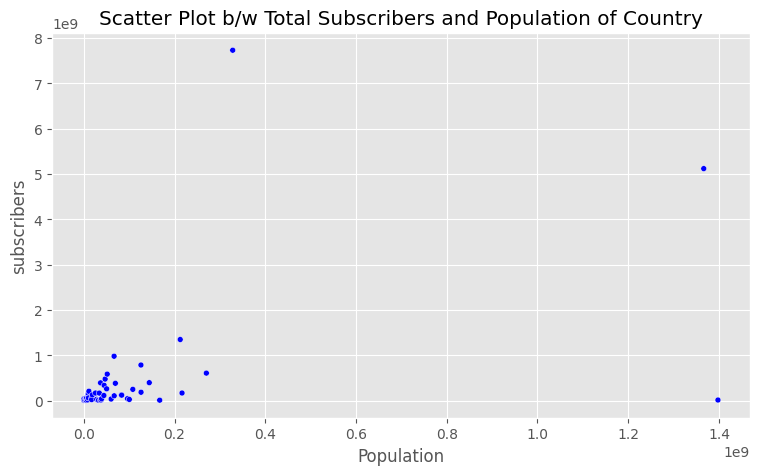

In [36]:
plt.figure(figsize=(9, 5))
sns.scatterplot(df_subs_pop, x='Population', y='subscribers', 
                color='blue', size=1, legend=False)
plt.title('Scatter Plot b/w Total Subscribers and Population of Country')
plt.show()

#### As we can see the correlation is above 0 and there's slight positive trend in scatter plot. We can conclude that Population of a country slightly correlates/affects with Total Subscribers.

---

### 16. How do the top 10 countries with the highest number of YouTube channels compare in terms of their total population?

In [37]:
top10_countries = list(df['Country'].value_counts().head(10).index)
print(top10_countries)

['United States', 'India', 'Brazil', 'United Kingdom', 'Mexico', 'Indonesia', 'Spain', 'South Korea', 'Thailand', 'Canada']


In [38]:
country_pop_dict = {}
for i in top10_countries:
    country_pop_dict[i] = int(df[df['Country'] == i].iloc[0]['Population'])

print(country_pop_dict)

{'United States': 328239523, 'India': 1366417754, 'Brazil': 212559417, 'United Kingdom': 66834405, 'Mexico': 126014024, 'Indonesia': 270203917, 'Spain': 47076781, 'South Korea': 51709098, 'Thailand': 69625582, 'Canada': 36991981}


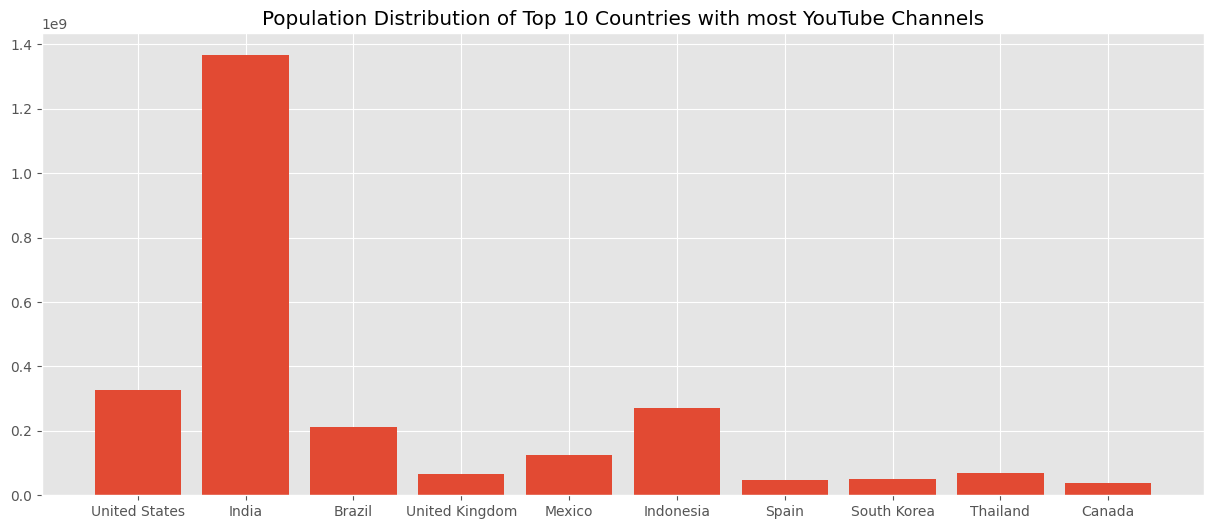

In [39]:
plt.figure(figsize=(15, 6))
plt.bar(x=np.arange(1, 11), height=list(country_pop_dict.values()))
plt.xticks(ticks=np.arange(1, 11), labels=list(country_pop_dict.keys()))
plt.title('Population Distribution of Top 10 Countries with most YouTube Channels')
plt.show()

#### India is significantly in lead followed by United States and Indonesia.

---

### 17. Is there a correlation between the number of subscribers gained in the last 30 days and the unemployment rate in a country?

In [40]:
df_unemp_last_30days_subs = df.groupby('Unemployment rate')['subscribers_for_last_30_days'].sum().to_frame().reset_index().dropna()
df_unemp_last_30days_subs.head()

,Unemployment rate,subscribers_for_last_30_days
0,0.75,1800000.0
1,1.64,400010.0
2,2.01,300000.0
3,2.15,1700000.0
4,2.18,1300000.0


In [41]:
df_unemp_last_30days_subs.corr().iloc[0, 1]

0.19107704530358594

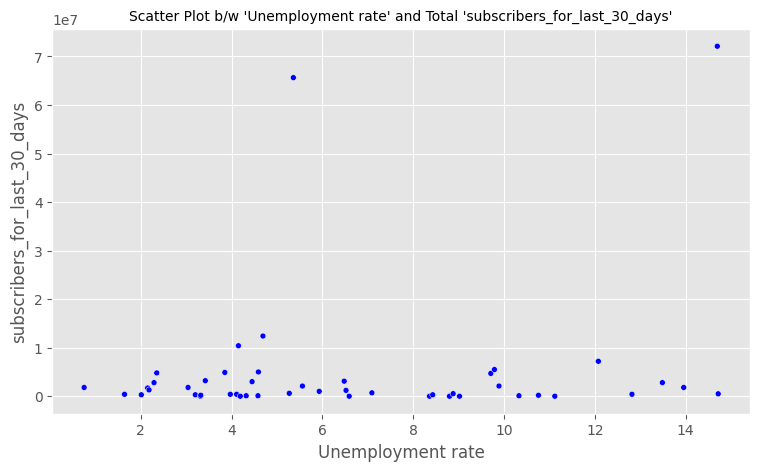

In [42]:
plt.figure(figsize=(9, 5))
sns.scatterplot(df_unemp_last_30days_subs, x='Unemployment rate', 
                y='subscribers_for_last_30_days', color='blue', 
                size=1, legend=False)
plt.title("Scatter Plot b/w 'Unemployment rate' and Total 'subscribers_for_last_30_days'", fontsize=10)
plt.show()

#### The correlation is just above 0 and there doesn't seem to be any trend in scatter plot. We can conclude that Unemployment Rate & Subscribers gained in past 30 days are not correlated.

---

### 18. How does the distribution of video views for the last 30 days vary across different channel types?

In [43]:
df.groupby('channel_type')['video_views_for_the_last_30_days'].sum()

channel_type
Animals          2.122050e+09
Autos            3.532615e+08
Comedy           9.859311e+09
Education        9.220914e+09
Entertainment    6.425548e+10
Film             5.693128e+09
Games            9.416914e+09
Howto            2.209437e+09
Music            3.804954e+10
News             5.314744e+09
Nonprofit        1.951810e+08
People           1.767473e+10
Sports           2.128495e+09
Tech             9.365297e+08
Name: video_views_for_the_last_30_days, dtype: float64

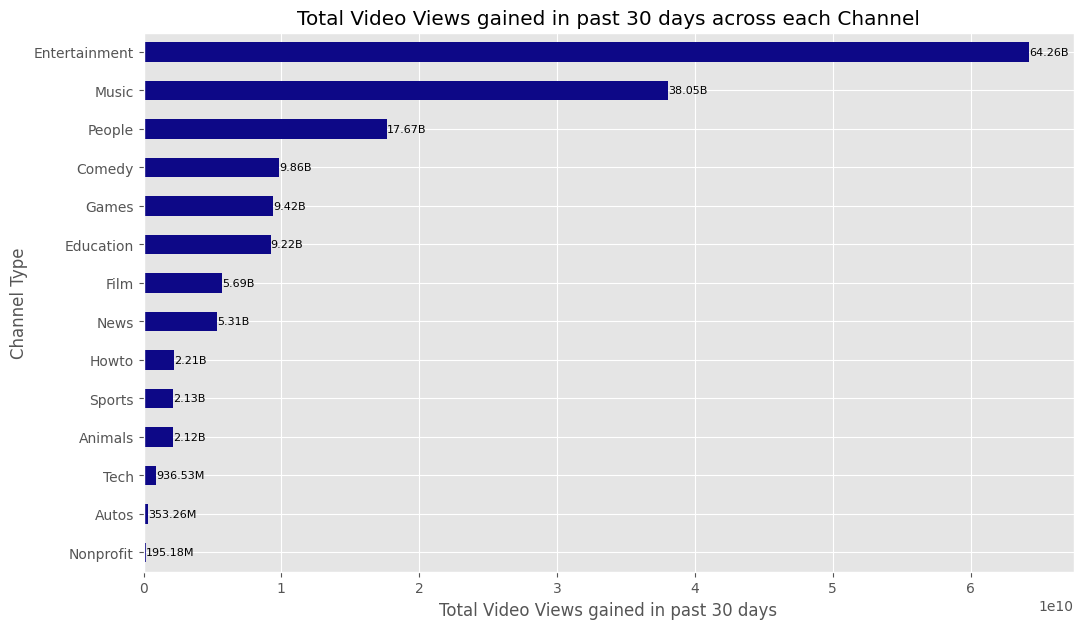

In [44]:
df.groupby('channel_type')['video_views_for_the_last_30_days'].sum().sort_values().plot(kind='barh', 
                                                                                         title='Total Video Views gained in past 30 days across each Channel', 
                                                                                         figsize=(12,7), 
                                                                                         colormap='plasma')

for i,j in enumerate(df.groupby('channel_type')['video_views_for_the_last_30_days'].sum().sort_values(ascending=False).values):
    if j > 1000000000:
        plt.text(j, 13-i, f"{round(j/1000000000, 2)}B", va='center', fontsize=8, color='black')
    else:
        plt.text(j, 13-i, f"{round(j/1000000, 2)}M", va='center', fontsize=8, color='black')

plt.xlabel('Total Video Views gained in past 30 days')
plt.ylabel('Channel Type')
plt.show()

---

### 19. Are there any seasonal trends in the number of videos uploaded by YouTube channels?

#### This question can't be answered as there's no data on date-wise uploads of each YouTube channel. If the number of uploads per specific time intervals is given then we could have answered this question. 

#### I have instead looked into Created Dates, Quarters and plotted 2 charts. 1st one is total uploads by YouTube channels and Year-Quarter the channel was created. 2nd is total number of uploads and quarters of creation dates.

In [45]:
#df[df['Youtuber'] == 'YouTube']
# Removing this record as it was 

In [46]:
a = df.drop(98, axis=0).sort_values('Created_Date')
a.head()

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude,Created_Date
180,181.5,Michael Jackson,28200000,14412474625,Music,Michael Jackson,15,United States,US,Music,228.0,56,59,158591000.0,39600,634400,475800,7600000,200000.0,88.2,328239523,14.70,270663028,37.090240,-95.712891,2005-06-22
512,514.5,Apple,17300000,1026425106,Science & Technology,Apple,180,United States,US,Tech,953.0,192,9,46484000.0,11600,185900,139500,2200000,100000.0,88.2,328239523,14.70,270663028,37.090240,-95.712891,2005-06-22
67,68.0,Ishtar Music,41400000,17608931161,Trailers,Ishtar Music,4510,India,IN,Music,152.0,20,28,180942000.0,45200,723800,542800,8700000,400000.0,28.1,1366417754,5.36,471031528,20.593684,78.962880,2005-09-22
421,421.5,shane,19200000,4329121104,People & Blogs,shane,570,United States,US,Comedy,735.0,160,25,2730000.0,683,10900,8200,131100,NaN,88.2,328239523,14.70,270663028,37.090240,-95.712891,2005-09-22
182,183.0,Drake,28100000,15318895118,Music,drake,3,United States,US,Film,201.0,57,12,31.0,0,0,0,1,1.0,88.2,328239523,14.70,270663028,37.090240,-95.712891,2005-09-23


In [47]:
# Creating 3 new columns Year, Quarter and Year-Quarter
a['Year'] = a['Created_Date'].dt.year
a['Quarter'] = a['Created_Date'].dt.quarter
a['Year-Quarter'] = a.apply(lambda row: str(row['Year']) + '-' + 'Q' + str(row['Quarter']), axis=1)

In [48]:
a.groupby('Year-Quarter')['uploads'].sum().sort_index()

Year-Quarter
2005-Q2       195
2005-Q3      5099
2005-Q4    413211
2006-Q1    318659
2006-Q2    281199
            ...  
2021-Q2      6422
2021-Q3      3491
2021-Q4        28
2022-Q1       322
2022-Q2       515
Name: uploads, Length: 69, dtype: int64

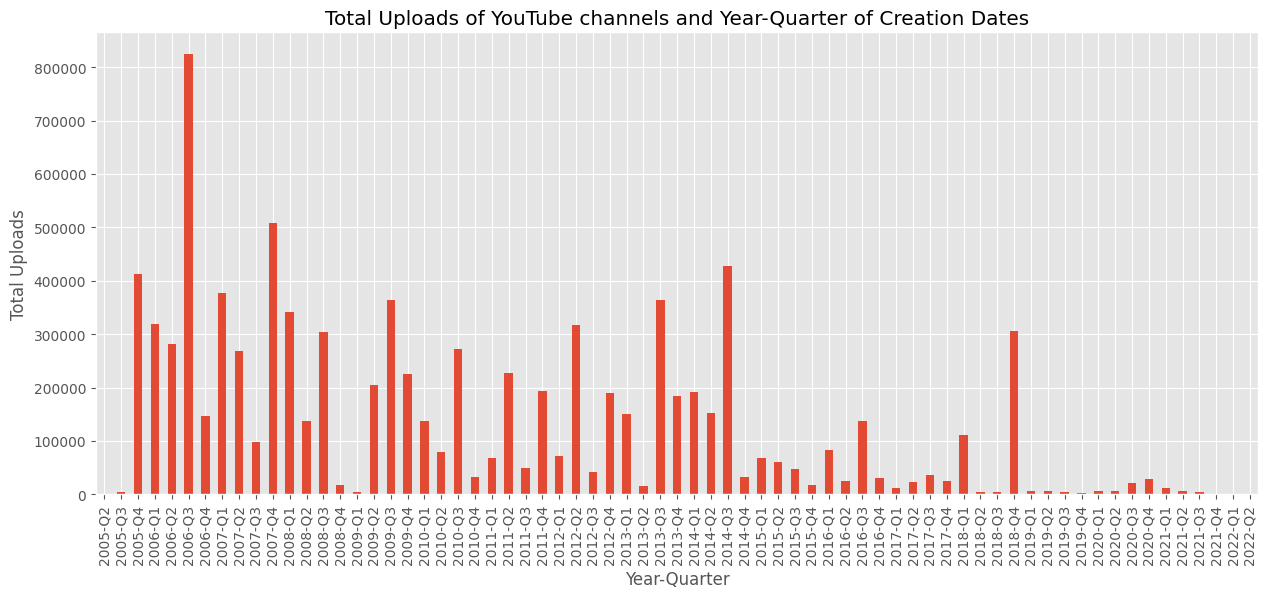

In [49]:
a.groupby('Year-Quarter')['uploads'].sum().sort_index().plot(kind='bar', 
                                                             figsize=(15, 6), 
                                                             title='Total Uploads of YouTube channels and Year-Quarter of Creation Dates')
plt.ylabel('Total Uploads')
plt.show()

#### We can see that the YouTube channels created in 3rd quarter of 2006 have highest number of video uploads till now. The ones created just 6-7 years back and above don't have much video uploads which is understandable.

In [50]:
a.groupby('Quarter')['uploads'].sum().sort_index()

Quarter
1    1960599
2    1813474
3    3001879
4    2352726
Name: uploads, dtype: int64

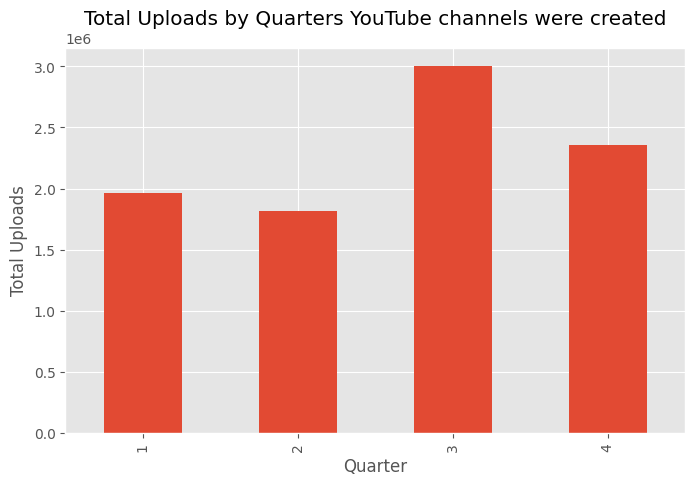

In [51]:
a.groupby('Quarter')['uploads'].sum().sort_index().plot(kind='bar', 
                                                        figsize=(8, 5), 
                                                        title='Total Uploads by Quarters YouTube channels were created')
plt.ylabel('Total Uploads')
plt.show()

#### YouTube channels created in 3rd quarter seem to have higher number of uploads in total.

---

### 20. What is the average number of subscribers gained per month since the creation of YouTube channels till now?

In [52]:
# Example of getting number of days between 2 dates
(df['Created_Date'].loc[1] - df['Created_Date'].loc[0]).days

2170

In [53]:
from datetime import datetime

# Assuming 'Created_Date' column is already in datetime format
df['Months Elapsed till 2024-04-08'] = df['Created_Date'].apply(lambda x: round(((datetime(2024, 4, 8) - x).days) / 30))

In [54]:
df[['Created_Date', 'Months Elapsed till 2024-04-08']].head()

,Created_Date,Months Elapsed till 2024-04-08
0,2006-03-13,220
1,2012-02-20,148
2,2006-09-01,214
3,2006-09-20,214
4,2015-05-12,108


In [55]:
# Average number of subscribers gain per month would be total subscribers divided by number of months elapsed since creation till now
df['Avg Subs gain per Month'] = df.apply(lambda row: round(row['subscribers']/row['Months Elapsed till 2024-04-08'], 2), axis=1)

In [56]:
df[['subscribers', 'Months Elapsed till 2024-04-08', 'Avg Subs gain per Month']].head()

,subscribers,Months Elapsed till 2024-04-08,Avg Subs gain per Month
0,245000000,220,1113636.36
1,166000000,148,1121621.62
2,162000000,214,757009.35
3,159000000,214,742990.65
4,112000000,108,1037037.04


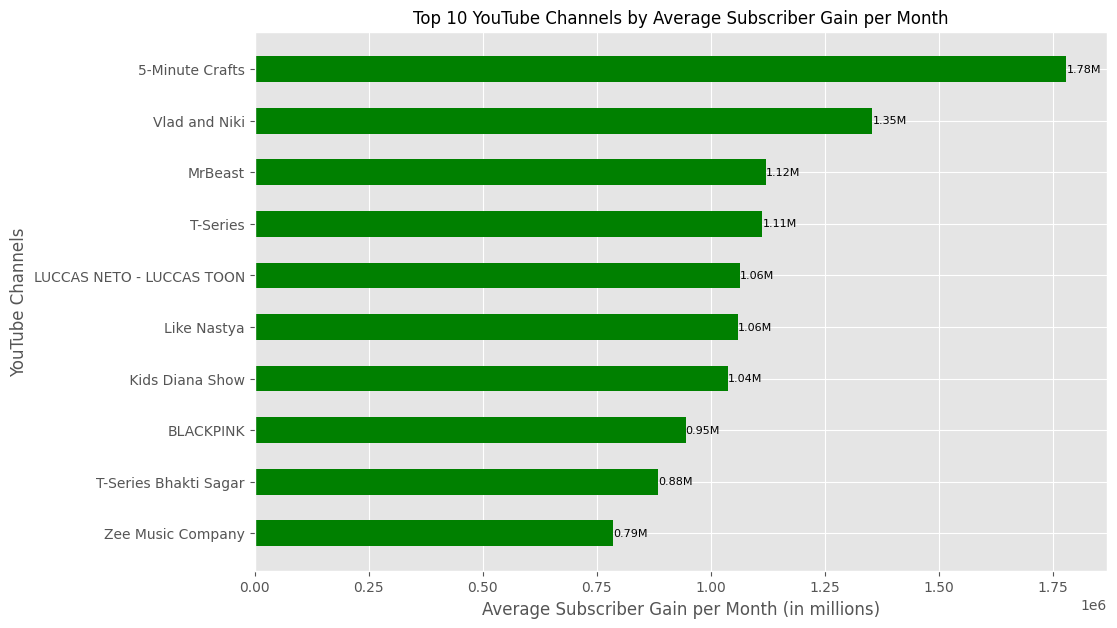

In [57]:
# Visualizing Top 10 highest Average Subscriber Gained YouTube channels
b = df.sort_values('Avg Subs gain per Month', ascending=False).head(10).sort_values('Avg Subs gain per Month')

plt.figure(figsize=(11,7))
plt.barh(y=b['Youtuber'], width=b['Avg Subs gain per Month'], color='green', height=0.5)
for i,j in enumerate(b['Avg Subs gain per Month'].sort_values(ascending=False)):
    plt.text(j, 9-i, f"{round(j/1000000, 2)}M", va='center', fontsize=8, color='black')

plt.xlabel('Average Subscriber Gain per Month (in millions)')
plt.ylabel('YouTube Channels')
plt.title('Top 10 YouTube Channels by Average Subscriber Gain per Month', fontsize=12)
plt.show()

---

## THE END